# Identifying Stationarity
Feb 21st 2022

In [1]:
import sys
print(sys.executable)
import numpy as np
import pandas as pd
import os
print(os.getcwd())
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
from IPython.display import display
from src.timeseriesFunctions import plot_time_series
from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller test
# Config:
SEED= 42
pd.options.display.float_format = '{:,.2f}'.format
sns.set_context("paper", font_scale= 1.5)
plt.rcParams['axes.spines.right']= False
plt.rcParams['axes.spines.top']= False
plotsize = (13, 5)
plt.rcParams['figure.figsize']= plotsize

/home/razielar/miniconda3/envs/time-series/bin/python
/home/razielar/Documents/git_rep/Machine_learning/time_series_forecasting/coursera_time_series/week_2/1_stationairy_time_series


## Identifying Stationarity
* 1) Exploratory Data Analysis (EDA) of the time-series
* 2) Summary statistics for mean and variance
* 3) Agumented Dickey-Fuller test

In [2]:
np.random.seed(SEED)

#data
time= np.arange(100)
stationary= np.random.normal(loc= 0, scale= 1.0, size= len(time))
trend= (time * 2.75) + stationary

### 1) EDA of the time-series

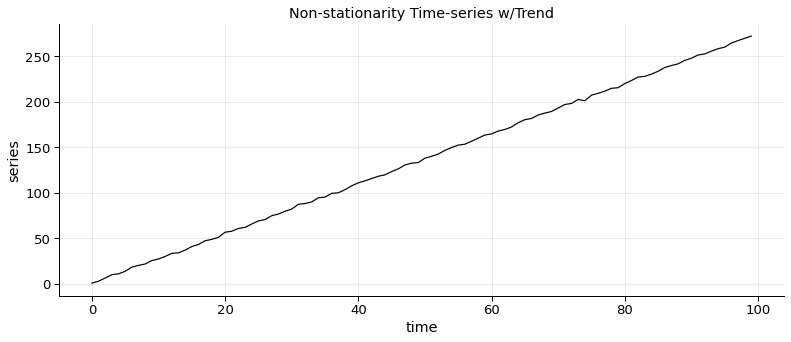

In [3]:
# 1) EDA of the time-series
plot_time_series(time, trend, title= "Non-stationarity Time-series w/Trend")

### 2) Summary Statistics & Plots

In [4]:
# split data into 10 chunks
chunks= np.split(trend, indices_or_sections= 10)
chunks[0]

array([ 0.49671415,  2.6117357 ,  6.14768854,  9.77302986, 10.76584663,
       13.51586304, 18.07921282, 20.01743473, 21.53052561, 25.29256004])

In [5]:
print("{} | {:7} | {}".format("Chunk", "Mean", "Variance"))
print("-" * 26)
for i,j in enumerate(chunks, 1):
    print("{:5} | {:.6} | {:.6}".format(i, np.mean(j), np.var(j)))

Chunk | Mean    | Variance
--------------------------
    1 | 12.8231 | 62.548
    2 | 39.0843 | 60.8662
    3 | 67.1532 | 58.7456
    4 | 94.5649 | 57.2321
    5 | 122.122 | 58.9505
    6 | 150.074 | 65.1111
    7 | 177.36 | 67.7091
    8 | 204.827 | 54.8101
    9 | 232.476 | 62.6766
   10 | 259.726 | 61.6424


In [6]:
def chunks_statistics(np_chunk_array):
    print("{} | {:7} | {}".format("Chunk", "Mean", "Variance"))
    print("-" * 26)
    for i,j in enumerate(np_chunk_array, 1):
        print("{:5} | {:.6} | {:.6}".format(i, np.mean(j), np.var(j)))

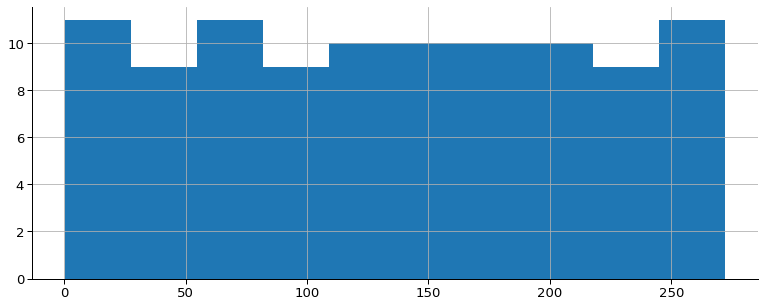

In [7]:
pd.Series(trend).hist()
plt.show()

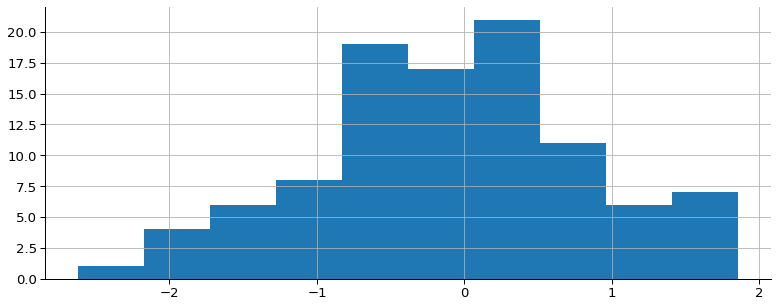

In [8]:
pd.Series(stationary).hist()
plt.show()

### 3) Statistical test
Null hypothesis= time-series is non-stationary  
Whether or not there's a high correlation between the current value and some lag values. That will be the case if: trends

In [9]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(trend)
# adf: test statistic
print("Test statistics: {:.6}, P.value: {:.6}".format(adf, pvalue))

Test statistics: 0.331887, P.value: 0.978761


## Exercise

In [10]:
mytime= np.arange(100)
data_path= "../course_data/"
dataset_1= np.load(data_path + "dataset_SNS_1.npy")
dataset_2= np.load(data_path + "dataset_SNS_2.npy")

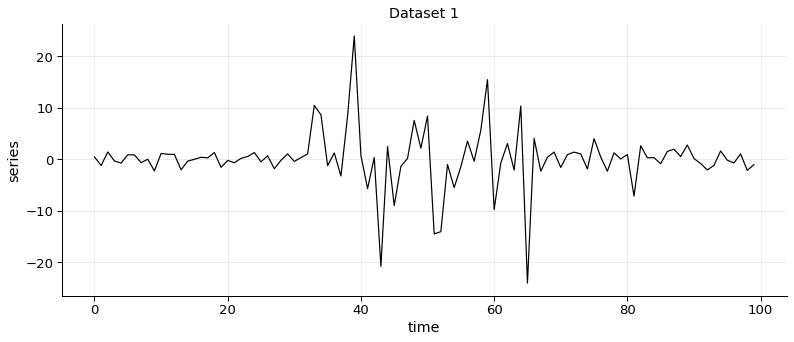

In [11]:
plot_time_series(mytime, dataset_1, title= "Dataset 1")

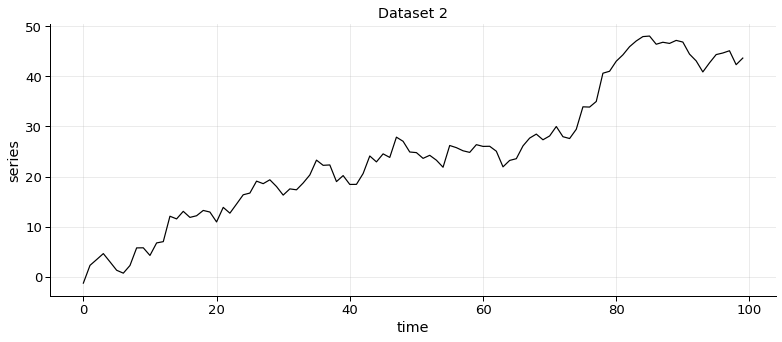

In [12]:
plot_time_series(mytime, dataset_2, title= "Dataset 2")

In [13]:
chunks_1= np.split(dataset_1, indices_or_sections= 10)
chunk_2= np.split(dataset_2, indices_or_sections= 10)

print('Dataset 1')
chunks_statistics(chunks_1)
print('')
print('Dataset 2')
chunks_statistics(chunk_2)

Dataset 1
Chunk | Mean    | Variance
--------------------------
    1 | -0.143683 | 1.10649
    2 | 0.121089 | 1.16522
    3 | 0.0471478 | 0.766352
    4 | 4.92083 | 59.9199
    5 | -2.32627 | 55.9468
    6 | -0.37065 | 79.1684
    7 | -1.95085 | 77.8156
    8 | 0.346349 | 3.18839
    9 | 0.304831 | 7.29303
   10 | -0.519078 | 1.34695

Dataset 2
Chunk | Mean    | Variance
--------------------------
    1 | 2.81862 | 4.50258
    2 | 10.5108 | 9.30344
    3 | 16.0225 | 7.51911
    4 | 19.7325 | 4.97895
    5 | 23.2678 | 9.42708
    6 | 24.6079 | 1.77172
    7 | 25.5432 | 3.9608
    8 | 32.7358 | 22.713
    9 | 46.2894 | 2.22467
   10 | 43.7735 | 2.4782


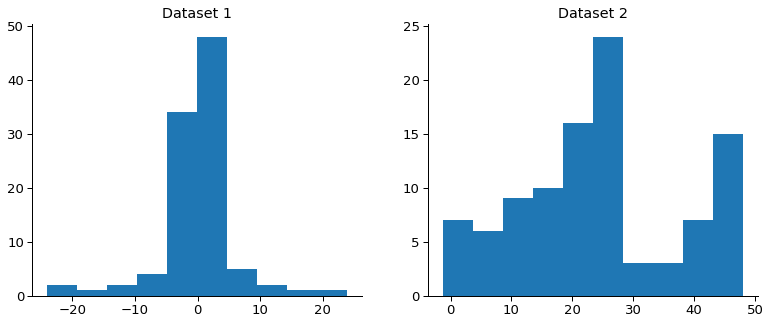

In [14]:
series_1= pd.Series(dataset_1)
series_2= pd.Series(dataset_2)

fig, axes= plt.subplots(1,2)
axes[0].hist(series_1)
axes[0].set_title("Dataset 1")

axes[1].hist(series_2)
axes[1].set_title("Dataset 2")

plt.show()

In [15]:
adf_1, pvalue_1, usedlag_, nobs_, critical_values_1, icbest_ = adfuller(dataset_1)
print("Dataset 1")
print("Augmented Dickey-Fuller: ", np.round(adf_1, 4))
print("p-value:", np.round(pvalue_1, 4))
print("crit values: ", critical_values_1)

print()

adf_2, pvalue_2, usedlag_, nobs_, critical_values_2, icbest_ = adfuller(dataset_2)
print("Dataset 2")
print("ADF: ", np.round(adf_2, 4))
print("p-value:", np.round(pvalue_2,4))
print("crit values: ", critical_values_2)

Dataset 1
Augmented Dickey-Fuller:  -3.0324
p-value: 0.032
crit values:  {'1%': -3.50434289821397, '5%': -2.8938659630479413, '10%': -2.5840147047458037}

Dataset 2
ADF:  -1.3223
p-value: 0.6189
crit values:  {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}
